In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

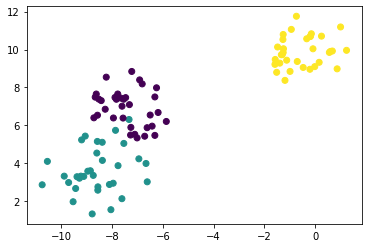

In [2]:
# Génération de données
X,y = make_blobs(n_samples = 100, centers =3, cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y)

In [4]:
from sklearn.cluster import KMeans

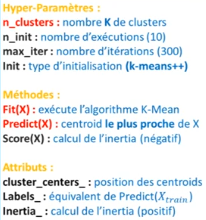

160.7466632167007

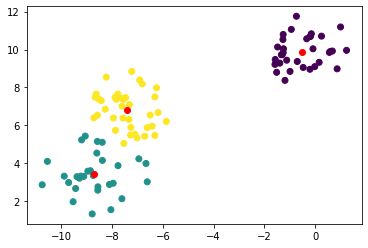

In [5]:
model = KMeans(n_clusters=3)
model.fit(X)
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
model.cluster_centers_ # nos centroid
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')
model.inertia_

In [6]:
model.score(X)

-160.74666321670068

Pour trouver le bon nombre de clusters:

`<<Elbow Method>>`: 

Détecter une zone de `<<coude>>` dans minimisation du coût (inertia_)

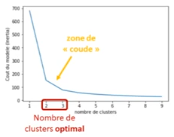

In [7]:
inertia = []
K_range = range(1,20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)
    

C:\Users\ZEUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Cout du modèle (Inertia)')

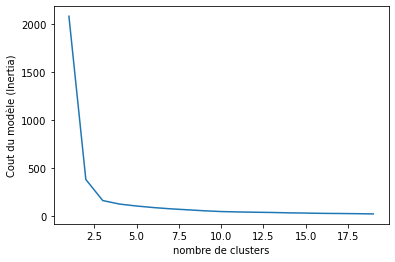

In [9]:
plt.plot(K_range,inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modèle (Inertia)')

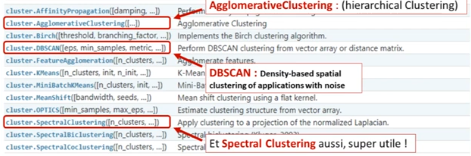

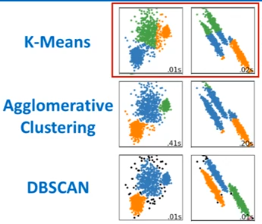

# Detection d'anomalité

## Isolation Forest

On effectue une série de split aléatoires, et on compte le nombre de split qu'il faut effectuer pour pouvoir isoler nos échantillons.

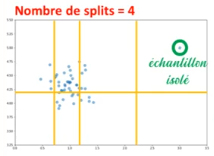

Pour isoler cet échantillon, il suffit de tracer un trait hasard dans cette zone

# Technique d'ensemble

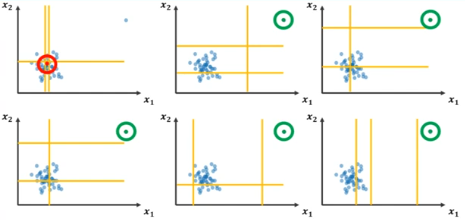

Dans sklearn il suffit de definir le pourcentage de données que vous  désirez filtrer (taux de contamination) 

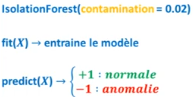

In [1]:
from sklearn.ensemble import IsolationForest

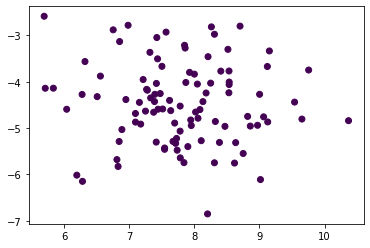

In [12]:
X,y = make_blobs(n_samples = 100, centers =1, cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y)

In [15]:
model = IsolationForest(contamination=0.15)
model.fit(X)

IsolationForest(contamination=0.15)

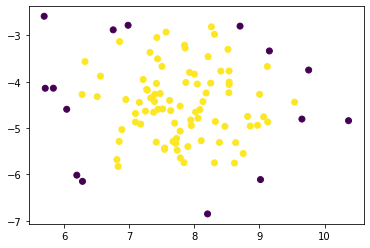

In [16]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

## Analyse en composantes principales

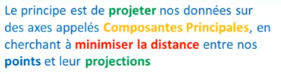


In [17]:
from sklearn.datasets import load_digits

In [20]:
digits = load_digits()
images = digits.images
x = digits.data
y = digits.target
print(x.shape,y.shape)

(1797, 64) (1797,)


In [19]:
from sklearn.decomposition import PCA

# Data visualisation

In [21]:
model = PCA(n_components=2)
x_reduced = model.fit_transform(x)

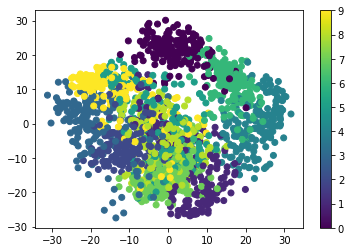

In [22]:
plt.scatter(x_reduced[:,0],x_reduced[:,1],c=y)
plt.colorbar()

In [31]:
model.components_.shape # combinaison linéaire entre les composantes et les variables de x

(2, 64)

## Compression de données
Objectif: réduire le nombre de variable en conservant 95%, 99% de la variance

`model.explained_variance_ratio_` indique le pourcentage de variance préservé par chaque composante.

cumsum(explained_variance_ratio_)
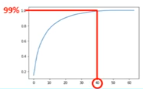


In [32]:
model = PCA(n_components=64)
x_reduced = model.fit_transform(x)

In [35]:
np.cumsum(model.explained_variance_ratio_)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

Cherchons à partir de combien de composantes nous préservons 99% d'informations

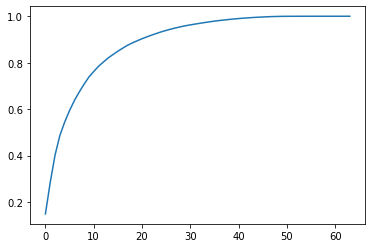

In [37]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [40]:
np.argmax(np.cumsum(model.explained_variance_ratio_)>0.99)

40

In [55]:
model = PCA(n_components=40)
x_reduced = model.fit_transform(x)

pour observer une image compressé

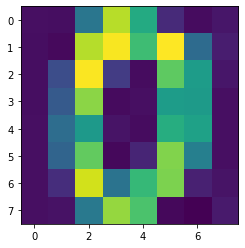

In [59]:
x_recover = model.inverse_transform(x_reduced)
plt.imshow(x_recover[0].reshape((8,8)))

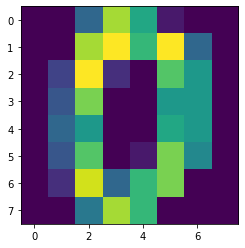

In [58]:
plt.imshow(x[0].reshape((8,8)))

Une manière beaucoup plus efficace pour faire la compression de données

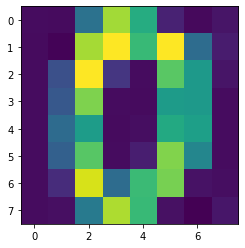

In [29]:
model = PCA(n_components=0.99)
x_reduced = model.fit_transform(x)
x_recover = model.inverse_transform(x_reduced)
plt.imshow(x_recover[0].reshape((8,8)))

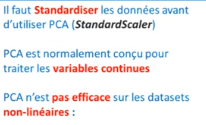